/var/folders/cz/mrs9z_6925xf5jgc4pkxz2380000gn/T/ipykernel_349/1312227545.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))


confidence:  0.9903412416446837
3395.770442404958


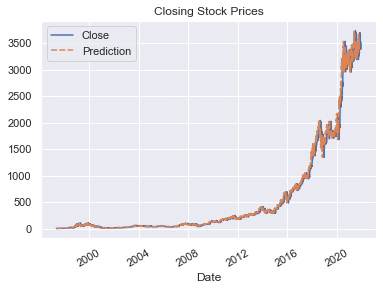

In [25]:
import quandl
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as pl


import seaborn as sns
import yfinance as yf


from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
#replacement for cross validation
from sklearn.model_selection import train_test_split


ticker = yf.Ticker("AMZN")
df = ticker.history(period="max")

df = df[['Close']]
forecast_out = int(30)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]
# below sentence has been modified for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)
temp=[]
for count in forecast_prediction:
    temp.append(count)



sns.lineplot(data=df)
sns.set_theme()  # Default seaborn style
plt.xticks(rotation=30)
plt.title(f"Closing Stock Prices")
plt.show()
